# Using the iris data set on sklearn build a random forest model

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["target"] = iris.target

In [7]:
df[0:2]

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


Training, Modelling and Prediction

In [17]:
X= df.drop('target', axis = 1)
y = df.target

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
81     1
133    2
137    2
75     1
109    2
96     1
105    2
66     1
Name: target, dtype: int32

In [37]:
X_test

,0,1,2,3
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [38]:
model.score(X_test, y_test)

0.9811320754716981

In [39]:
y_predicted_value = model.predict(X_test)

In [40]:
y_predicted_value 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1])

Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
con_max = confusion_matrix(y_test, y_predicted_value)
con_max

array([[19,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 16]], dtype=int64)

Text(69.0, 0.5, 'Truth')

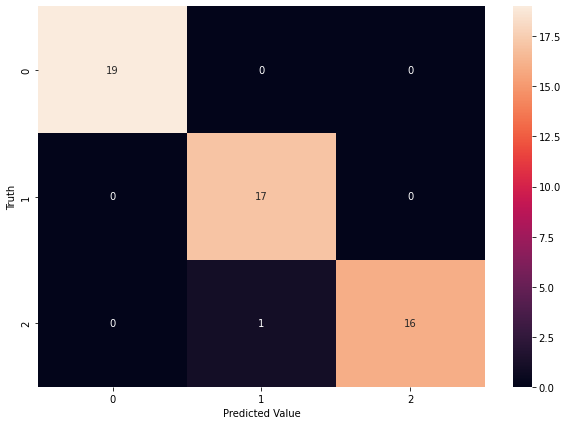

In [42]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(con_max, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("Truth")